# Error Analysis Visualization

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(np.int64) # y must be int64 for LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [4]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix: Error rate = 8.36%')

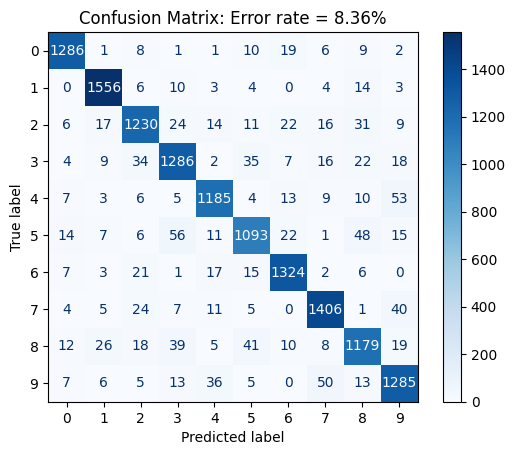

In [7]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
# NOTE: If you are using scikit-learn 0.24.2 or higher, you can use the following line to plot the confusion matrix:
disp.plot(cmap=plt.cm.Blues, values_format='d') 
plt.title('Confusion Matrix: Error rate = {:.2f}%'.format(100*(1 - model.score(X_test, y_test))))


*Using the confusion Matrix: we've seen that most error occur misclassifying 5 as 3*
*The error rate is found to be around 8 percent*

# Tracking Error reduction

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
tuning_iterations = [10, 100, 200, 500, 1000]
errors = []
for i in tuning_iterations: # Train the model
    model = LogisticRegression(max_iter=i) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) 
    errors.append(1 - accuracy_score(y_test, y_pred)) # Calculate the error rate

C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

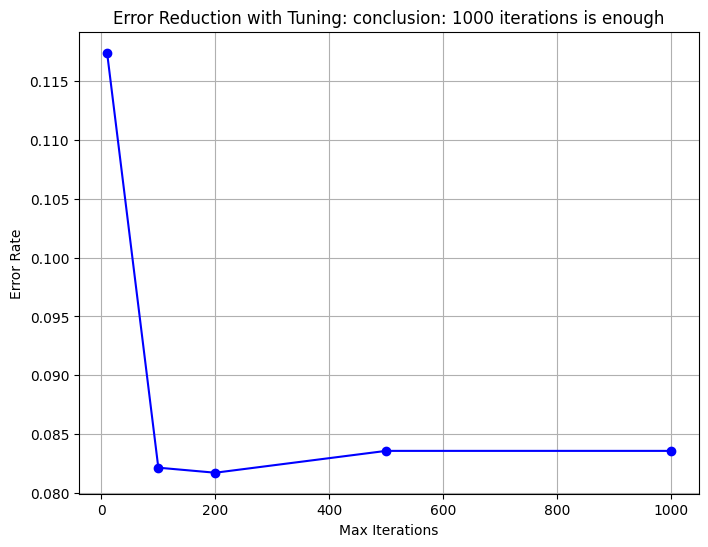

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(tuning_iterations, errors, marker='o', linestyle='-', color='b')
plt.xlabel("Max Iterations")
plt.ylabel("Error Rate")
plt.title("Error Reduction with Tuning: conclusion: 1000 iterations is enough")
plt.grid()
plt.show()

**conclusoin: 1000 iterations is enough, as the error rate does not decrease significantly after 1000 iterations**

# Visualizing Data Augmentation:

In [27]:
# Data Augmentation means increasing the size of the dataset by adding transformed copies of existing data

# We will use kera's ImageDataGenerator class to perform data augmentation,  we will create a generator that will take our data and apply a series of random transformations to it to create new images.

# example is to rotate the images by up to 10 degrees, zoom in by up to 20%, shift them vertically or horizontally by up to 10% of the image height or width, flip them horizontally, and normalize the pixel values. which helps to reduce overfitting and improve the model's performance.

%pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
X_train_augmented = X_train.values.reshape(-1, 28, 28, 1)
X_train_augmented = X_train_augmented/ 255.0

In [29]:
datagen = ImageDataGenerator( 
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train_augmented)

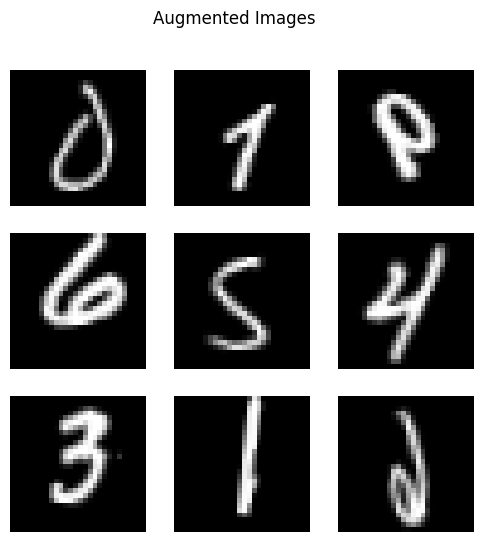

In [30]:
augmented_images, _ = next(datagen.flow(X_train_augmented, y_train, batch_size=9))
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle('Augmented Images')
plt.show()

*Tracking and comparing the performances*

C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


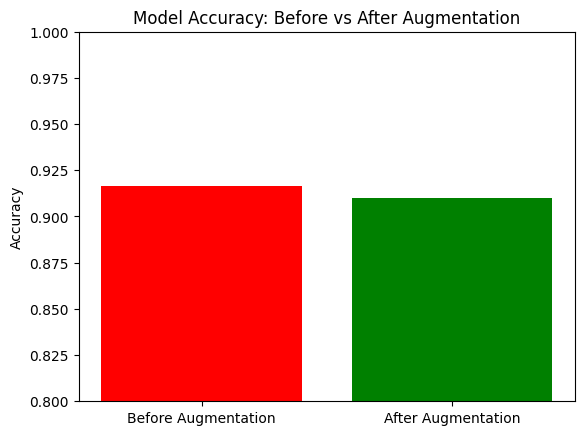

In [42]:
augmented_data = datagen.flow(X_train_augmented, y_train, batch_size=len(X_train_augmented))
X_augmented, y_augmented = next(augmented_data)  

X_augmented = X_augmented.reshape(X_augmented.shape[0], -1)

X_combined = np.vstack((X_train, X_augmented.reshape(X_train.shape)))  # stack original and augmented
y_combined = np.hstack((y_train, y_augmented))  # combine labels

model_augmented = LogisticRegression(max_iter=1000)
model_augmented.fit(X_combined, y_combined)
y_pred_augmented = model_augmented.predict(X_test)

accuracy_before = accuracy_score(y_test, model.predict(X_test))  # original model
accuracy_after = accuracy_score(y_test, y_pred_augmented)        # augmented model

plt.bar(['Before Augmentation', 'After Augmentation'], [accuracy_before, accuracy_after], color=['red', 'green'])
plt.title("Model Accuracy: Before vs After Augmentation")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.show()


*#conclusion: I failed to improve the model accuracy with data augmentation, and the model is great before augmentation. why is that so?? here's the answer: the MNIST dataset is already preprocessed and contains images that are centered and normalized, so the augmentation techniques we applied are not very useful in this case. In general, data augmentation is most useful when the dataset is small and the original images are not preprocessed.*

I have to do fine tuning for better augmentation with this data, but not this time sorry

# Transfer Learning 

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
# load the fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0


In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


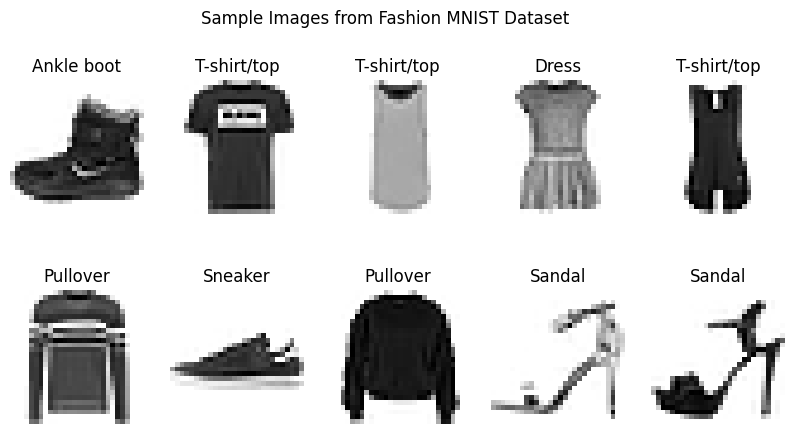

In [14]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.suptitle("Sample Images from Fashion MNIST Dataset")
plt.show()

We will use MobileNetV2 for transffer learning:

In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [17]:
# Resize the images to 32x32
train_images_resized = tf.image.resize(train_images, [32, 32])
test_images_resized = tf.image.resize(test_images, [32, 32])

base_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze pre-trained layers


C:\Users\samir\AppData\Local\Temp\ipykernel_22076\2779417236.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [19]:
model = Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),  # reshape to match MobileNetV2 input
    tf.keras.layers.Conv2D(3, (3, 3), padding="same", activation="relu"),  # 3 channel input
    tf.keras.layers.Resizing(32, 32),  # resize to match MobileNetV2 input
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # output layer for 10 classes
])

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 32ms/step - accuracy: 0.5695 - loss: 1.2809 - val_accuracy: 0.7052 - val_loss: 0.8298
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.6944 - loss: 0.8590 - val_accuracy: 0.7258 - val_loss: 0.7829
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.7138 - loss: 0.8066 - val_accuracy: 0.7317 - val_loss: 0.7625
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.7221 - loss: 0.7861 - val_accuracy: 0.7367 - val_loss: 0.7440
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.7302 - loss: 0.7638 - val_accuracy: 0.7406 - val_loss: 0.7354
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7379 - loss: 0.7357


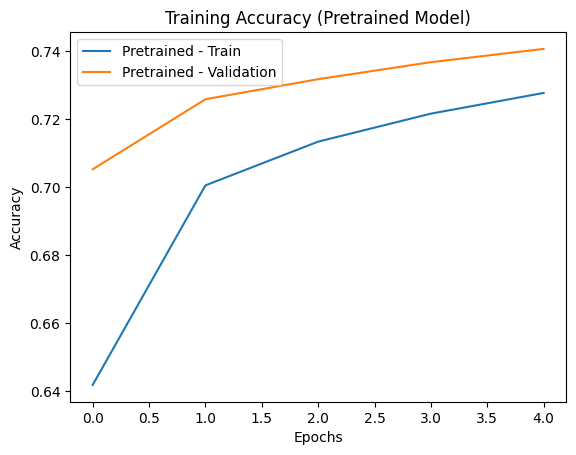

In [21]:
# train the model
history_pretrain = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# evaluate the pre-trained model
initial_accuracy = model.evaluate(test_images, test_labels)[1]

# visualize training accuracy
plt.plot(history_pretrain.history['accuracy'], label='Pretrained - Train')
plt.plot(history_pretrain.history['val_accuracy'], label='Pretrained - Validation')
plt.title("Training Accuracy (Pretrained Model)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


The graph shows the training and validation accuracy of the model using transfer learning with MobileNetV2. The initial accuracy of the pre-trained model is around 74%. The model's accuracy improves with each epoch, indicating that the model is learning and adapting well to the new dataset. Transfer learning has proven to be effective in this case, as it allows the model to leverage pre-trained features and achieve good performance with relatively few epochs of training.

The model's accuracy improved from 56.95% to 73.02% on the training set.
The validation accuracy also improved from 70.52% to 74.06%.
The loss decreased consistently for both training and validation sets, indicating that the model is learning and generalizing better over time.
Overall, the model shows a good improvement in performance over the epochs, with both accuracy and loss metrics indicating effective training.